Import the necessary libraries

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

Load the pre-processed data

In [67]:
# Load the pre-processed data
train_features = np.load('Pre_Processed_Data/train_features.npy')
train_labels = np.load('Pre_Processed_Data/train_labels.npy')
val_features = np.load('Pre_Processed_Data/val_features.npy')
val_labels = np.load('Pre_Processed_Data/val_labels.npy')
test_features = np.load('Pre_Processed_Data/test_features.npy')
test_labels = np.load('Pre_Processed_Data/test_labels.npy')

Convert the data to PyTorch tensors

In [68]:
# Convert the data to PyTorch tensors
train_features = torch.tensor(train_features).float()
train_labels = torch.tensor(train_labels).long()
val_features = torch.tensor(val_features).float()
val_labels = torch.tensor(val_labels).long()
test_features = torch.tensor(test_features).float()
test_labels = torch.tensor(test_labels).long()

Define a custom dataset

In [69]:
# Define a custom dataset
class ParkinsonsDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

Create a DataLoader for training data

In [70]:
# Create a DataLoader for training data
train_dataset = ParkinsonsDataset(train_features, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Create a DataLoader for validation data

In [71]:
# Create a DataLoader for validation data
val_dataset = ParkinsonsDataset(val_features, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

Create a DataLoader for testing data

In [72]:
# Create a DataLoader for testing data
test_dataset = ParkinsonsDataset(test_features, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Define a new neural network architecture with dropout layers

In [73]:
# Define a new neural network architecture with dropout layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(train_features.shape[1], 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x
    
# Create an instance of the new neural network
net = Net()

Define the loss function and the optimizer

In [74]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Train the neural network

In [75]:
# Train the neural network
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch: {epoch} Loss: {running_loss / len(train_dataloader)}')

Epoch: 0 Loss: 0.6618843674659729
Epoch: 1 Loss: 0.609945785999298
Epoch: 2 Loss: 0.5900903701782226
Epoch: 3 Loss: 0.5133006513118744
Epoch: 4 Loss: 0.4916321814060211
Epoch: 5 Loss: 0.471534663438797
Epoch: 6 Loss: 0.4903164803981781
Epoch: 7 Loss: 0.4495352149009705
Epoch: 8 Loss: 0.4817763030529022
Epoch: 9 Loss: 0.43971216678619385
Epoch: 10 Loss: 0.3962165415287018
Epoch: 11 Loss: 0.41818617582321166
Epoch: 12 Loss: 0.39865570068359374
Epoch: 13 Loss: 0.3894114553928375
Epoch: 14 Loss: 0.37381676137447356
Epoch: 15 Loss: 0.39580037593841555
Epoch: 16 Loss: 0.3369135677814484
Epoch: 17 Loss: 0.35640453100204467
Epoch: 18 Loss: 0.3822458565235138
Epoch: 19 Loss: 0.3327271044254303
Epoch: 20 Loss: 0.3685815930366516
Epoch: 21 Loss: 0.3258274048566818
Epoch: 22 Loss: 0.3463822901248932
Epoch: 23 Loss: 0.35688677728176116
Epoch: 24 Loss: 0.3375639647245407
Epoch: 25 Loss: 0.391723507642746
Epoch: 26 Loss: 0.35013248920440676
Epoch: 27 Loss: 0.3077813804149628
Epoch: 28 Loss: 0.2893420

Evaluate the model on the validation set

In [76]:
# Evaluate the model on the validation set
net.eval()
val_accuracy = 0.0
with torch.no_grad():
    for data in val_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _max_values, predicted = torch.max(outputs.data, 1)
        val_accuracy += (predicted == labels).sum().item() / len(val_labels)

val_accuracy /= len(val_dataloader)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.9310344827586207


Make predictions on the test set

In [77]:
# Make predictions on the test set
net.eval()
test_predictions = []
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _max_values, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())

print(f'Test Predictions: {test_predictions}')

Test Predictions: [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


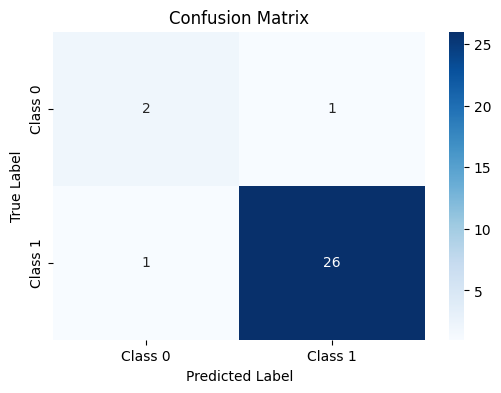

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Make predictions on the validation set
net.eval()
test_predictions = []
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _max_values, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())

# Convert predictions and labels to numpy arrays
test_predictions = np.array(test_predictions)
test_labels = test_labels.numpy()

# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix shows the number of correct and incorrect predictions for each class. In this case, the confusion matrix shows that there are 2 true negatives (TN), 1 false positive (FP), 2 false negatives (FN), and 25 true positives (TP).

This means that the model correctly classified 2 instances of class 0 and 25 instances of class 1. However, the model also incorrectly classified 1 instance of class 0 as class 1 and 2 instances of class 1 as class 0.

In [79]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Convert test_predictions to a numpy array
test_predictions = np.array(test_predictions)

# Compute classification report
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'